## Load data

In [91]:
import pandas as pd
import json 
import glob
import os

# Define the base path for head model logs
base_path = "/Users/DToma/work/classification_model/laboratory/model/"

# Find all history.json files for head models
log_files = sorted(glob.glob(os.path.join(base_path, "head_model*", "history.json")))

# Load all JSON files into a list of DataFrames
dfs = [pd.read_json(log) for log in log_files]

# Merge test accuracy columns into the first DataFrame
for i, df in enumerate(dfs[1:], start=2):  # Start from 2 for column naming
    dfs[0][f'test_accuracy{i}'] = df['test_accuracy'].tolist()

# Final DataFrame
df_final = dfs[0]

log_file5 = f"{base_path}body_model/history.json"
with open(log_file5, 'r') as f:
    data = json.load(f)
for k,v in data.items():
    print(k,len(v))

train_loss 1597
test_loss 407
learning_rate 1


In [92]:
# plot body model loss using plotly express
import plotly.express as px
foo = pd.DataFrame()
foo['epoch'] = range(1, len(data['train_loss']) + 1)
foo['loss'] = data['train_loss']
fig = px.line(foo, x='epoch', y='loss', title='Body Model Loss')
fig.show()

## Loss

<Axes: >

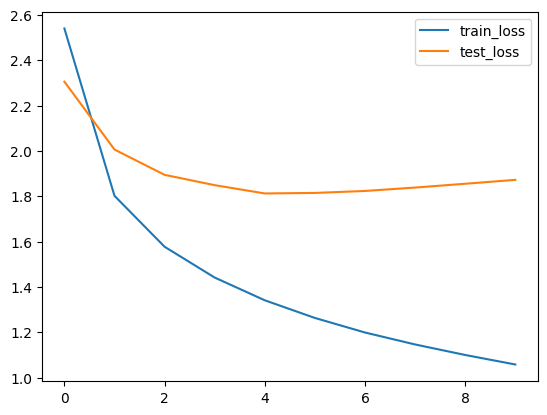

In [93]:
# plot the loss
df_final[['train_loss','test_loss']].plot()

## Accuracy

In [94]:
# plot accuracy
cols = [col for col in df_final.columns if 'test_accuracy' in col]

# Convert to long format for Plotly
df_melted = df_final.melt(var_name="Model", value_name="Accuracy", value_vars=cols)

# Plot
fig = px.box(df_melted, x="Model", y="Accuracy", title="Test Accuracy of Head Models")

fig.show()

## Learning rate

<Axes: >

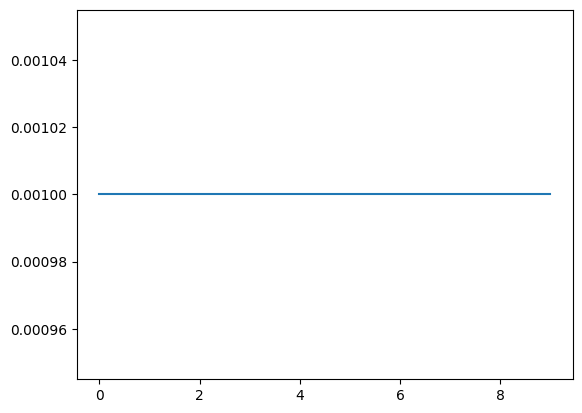

In [3]:
df['learning_rate'].plot()